In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", encoding ='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

# Data Cleaning

### Checking missing value 

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df_new = df.dropna()

In [6]:
df_new.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df_new.shape

(406829, 8)

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


### renaming column name

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
column = {

    'InvoiceNo':  'invoice_no',
    'StockCode':  'stoct_code',
    'Description': 'description',
    'Quantity':  'quantity',
    'InvoiceDate' : 'invoice_date',
    'UnitPrice' :  'unit_price',
    'CustomerID': 'customer_id',
    'Country':  'country'
}


In [11]:
df_new.rename(columns = column , inplace = True)

In [12]:
df_new.columns

Index(['invoice_no', 'stoct_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [13]:
df_new.head()

,invoice_no,stoct_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Changing description column value in upper case ---> lower case

In [14]:
df_new['description'] = df_new['description'].str.lower()

In [15]:
df_new.head()

,invoice_no,stoct_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Coverting dtype of customer_id	  & invoice_date

In [16]:
df_new.dtypes

invoice_no       object
stoct_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [17]:
df_new['customer_id'] = df_new['customer_id'].astype('int64')

In [18]:
df_new['invoice_date'] = pd.to_datetime(df_new.invoice_date , errors = 'coerce')

In [19]:
df_new.dtypes

invoice_no              object
stoct_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

In [20]:
df_new.head()

,invoice_no,stoct_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [21]:
df_new.describe().round(2)

,quantity,invoice_date,unit_price,customer_id
count,406829.00,406829,406829.00,406829.00
mean,12.06,2011-07-10 16:30:57.879207424,3.46,15287.69
min,-80995.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-06 15:02:00,1.25,13953.00
50%,5.00,2011-07-31 11:48:00,1.95,15152.00
75%,12.00,2011-10-20 13:06:00,3.75,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,248.69,NaN,69.32,1713.60


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Adding new column 

In [23]:
df_new['total_amount'] = df_new['quantity'] * df_new['unit_price']

In [24]:
df_new['year'] = df_new['invoice_date'].dt.year

In [25]:
df_new['months'] = df_new['invoice_date'].dt.month_name()

In [26]:
df_new['year_months'] = df_new['year'].astype(str) +" - " + df_new['months']

In [27]:
df_new.head()

,invoice_no,stoct_code,description,quantity,invoice_date,unit_price,customer_id,country,total_amount,year,months,year_months
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December,2010 - December
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,2010 - December
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December,2010 - December
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,2010 - December
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,2010 - December


# Exploratory Data Analysis (EDA)


In [28]:
df_new.groupby('year')['total_amount'].count().reset_index(name = 'quantity_sale_per_year')

,year,quantity_sale_per_year
0,2010,26850
1,2011,379979


In [29]:
df_new.groupby('year')['total_amount'].mean().reset_index(name = 'quantity_sale_per_year').round(2)

,year,quantity_sale_per_year
0,2010,20.66
1,2011,20.38


In [30]:
df_new.groupby('months')['unit_price'].count().reset_index()

,months,unit_price
0,April,23198
1,August,27662
2,December,44511
3,February,20363
4,January,21912
5,July,27502
6,June,27836
7,March,27822
8,May,28908
9,November,65598


### top 5 most number of order

In [31]:
orders = df_new.groupby(by=['customer_id','country'], as_index=False)['invoice_no'].count()
orders

,customer_id,country,invoice_no
0,12346,United Kingdom,2
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4375,18280,United Kingdom,10
4376,18281,United Kingdom,7
4377,18282,United Kingdom,13
4378,18283,United Kingdom,756


In [32]:
money_spent = df_new.groupby(by = ['customer_id', 'country'], as_index = False)['total_amount'].sum()

money_spent

,customer_id,country,total_amount
0,12346,United Kingdom,0.00
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4375,18280,United Kingdom,180.60
4376,18281,United Kingdom,80.82
4377,18282,United Kingdom,176.60
4378,18283,United Kingdom,2094.88


### Top 10 customers who spend highest money

In [33]:
money_spent.sort_values(by='total_amount', ascending = False).head(10)


,customer_id,country,total_amount
1711,14646,Netherlands,279489.02
4241,18102,United Kingdom,256438.49
3766,17450,United Kingdom,187482.17
1903,14911,EIRE,132572.62
57,12415,Australia,123725.45
1353,14156,EIRE,113384.14
3809,17511,United Kingdom,88125.38
3210,16684,United Kingdom,65892.08
1013,13694,United Kingdom,62653.10
2200,15311,United Kingdom,59419.34


# number of order in different customer id

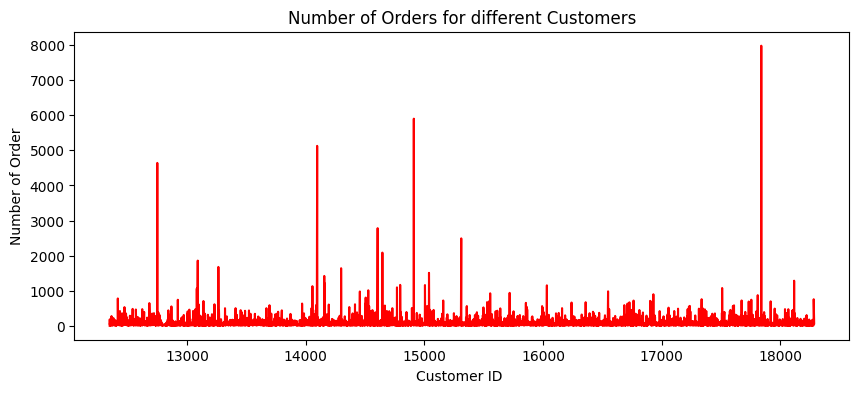

In [34]:
order = df_new.groupby(by = ['customer_id', 'country'], as_index = False)['invoice_no'].count()


plt.figure(figsize=( 10,4))

plt.plot(

    order.customer_id,
    order.invoice_no,
    color = 'r',
       
)

plt.xlabel('Customer ID ')
plt.ylabel('Number of Order')
plt.title('Number of Orders for different Customers')

plt.show()

### Highest sales on specific Month

In [35]:
hight_sales_months = df_new.groupby('invoice_no')['year_months'].unique().value_counts().sort_index()
hight_sales_months

year_months
[2010 - December]     1708
[2011 - April]        1384
[2011 - August]       1544
[2011 - December]      921
[2011 - February]     1202
[2011 - January]      1236
[2011 - July]         1593
[2011 - June]         1707
[2011 - March]        1619
[2011 - May]          1849
[2011 - November]     3086
[2011 - October]      2263
[2011 - September]    2078
Name: count, dtype: int64

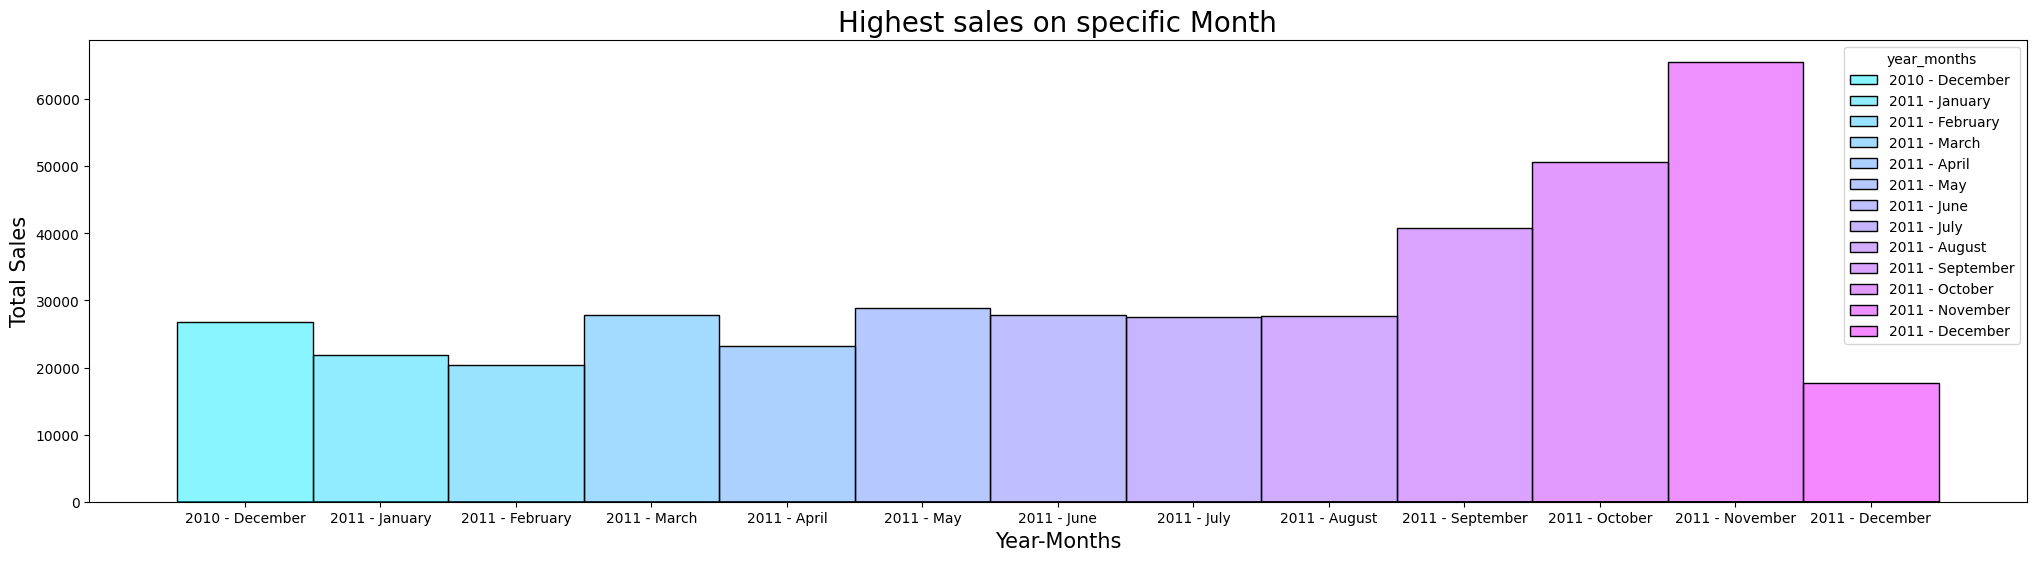

In [36]:
plt.figure(figsize=(25,6))
sns.histplot(
    data=df_new,
    x="year_months",
    palette = 'cool',
    hue = "year_months",
    kde = True
   

)

plt.xlabel('Year-Months', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)
plt.title('Highest sales on specific Month', fontsize = 20)
plt.show()


### How many orders (per day)?

In [37]:
df_new['day_name'] = df_new['invoice_date'].dt.day_name()

In [38]:
per_day_order = df_new.groupby('invoice_no')['day_name'].unique().sort_values().value_counts().reset_index()
per_day_order

,day_name,count
0,[Thursday],4978
1,[Wednesday],4110
2,[Tuesday],3892
3,[Monday],3512
4,[Friday],3356
5,[Sunday],2342


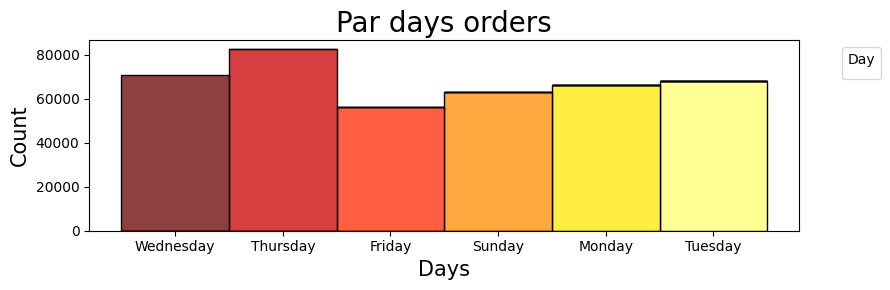

In [40]:
plt.figure(figsize= (9,3))

sns.histplot(

    x = 'day_name',
    data = df_new,
    palette = 'hot',
    hue = 'day_name',
    multiple='stack',
    binwidth = 1

)

plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.xlabel('Days', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Par days orders', fontsize=20)
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()

In [41]:
df_new.head()

,invoice_no,stoct_code,description,quantity,invoice_date,unit_price,customer_id,country,total_amount,year,months,year_months,day_name
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December,2010 - December,Wednesday
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,2010 - December,Wednesday
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December,2010 - December,Wednesday
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,2010 - December,Wednesday
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,2010 - December,Wednesday


### How many orders for each country?


In [48]:
country_ordered = df_new.groupby('country')['invoice_no'].count().reset_index()
country_ordered

,country,invoice_no
0,Australia,1259
1,Austria,401
2,Bahrain,17
3,Belgium,2069
4,Brazil,32
5,Canada,151
6,Channel Islands,758
7,Cyprus,622
8,Czech Republic,30
9,Denmark,389


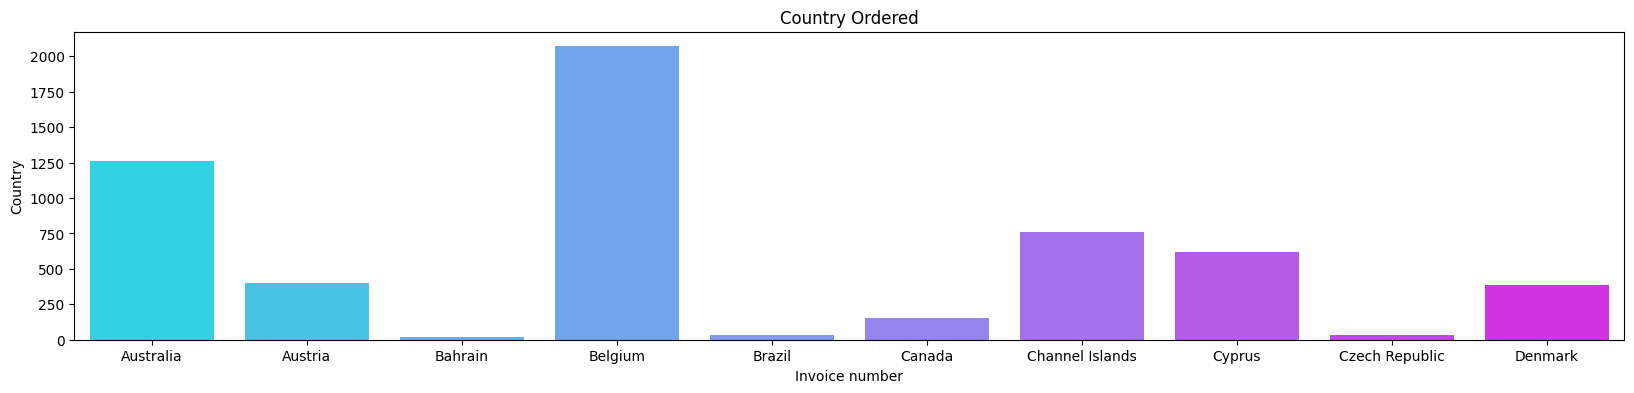

In [92]:
country_ordered = (df_new.groupby('country')['invoice_no'].count().reset_index()).head(10)

plt.figure(figsize=(20,4))
sns.barplot(
    data = country_ordered,
    x = 'country',
    y = 'invoice_no',
    palette = 'cool'
)

plt.xlabel('Invoice number')
plt.ylabel('Country')
plt.title('Country Ordered')
plt.show()

### How much money spent by each country?


In [73]:
country_money_spent = df_new.groupby('country')['total_amount'].sum().sort_values().reset_index().round(2)
country_money_spent

,country,total_amount
0,Saudi Arabia,131.17
1,Bahrain,548.40
2,Czech Republic,707.72
3,RSA,1002.31
4,Brazil,1143.60
5,European Community,1291.75
6,Lithuania,1661.06
7,Lebanon,1693.88
8,USA,1730.92
9,United Arab Emirates,1902.28


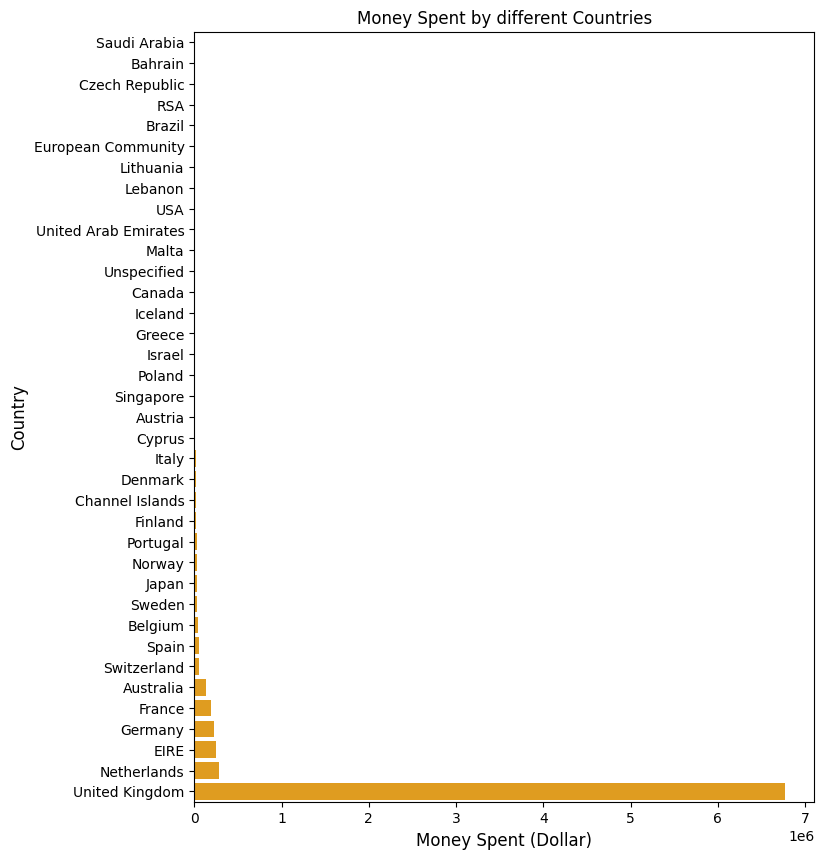

In [80]:
plt.figure(figsize=(8,10))

sns.barplot(

    data = country_money_spent,
    x = 'total_amount',
    y = 'country',
    color = 'orange'
)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

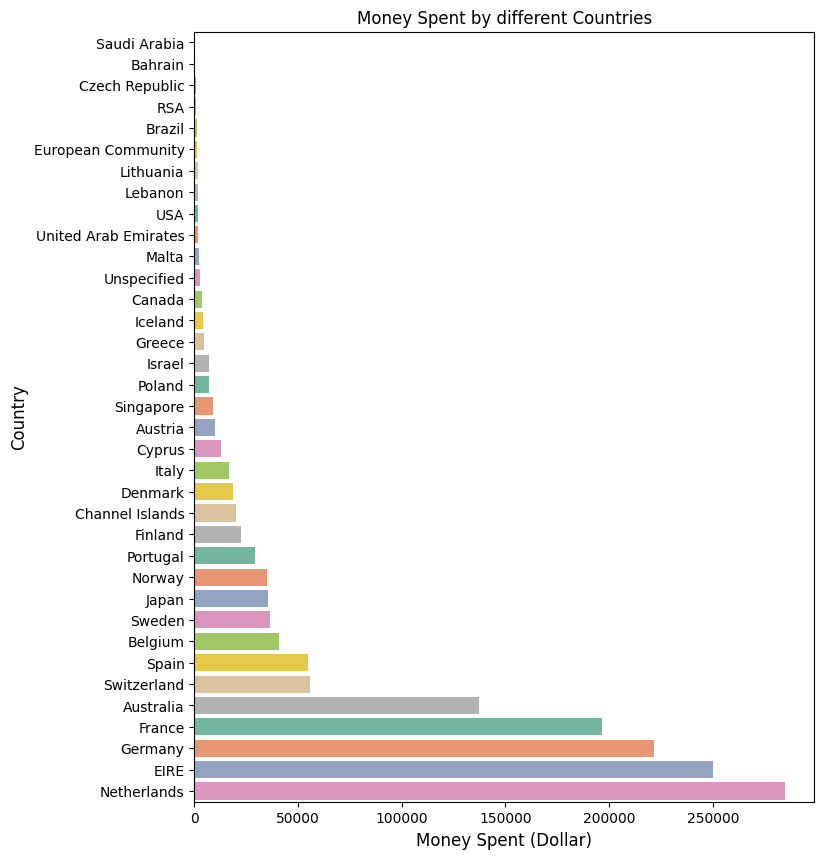

In [90]:
country_money_spent = df_new.groupby('country')['total_amount'].sum().sort_values().reset_index().round(2)

# plot total money spent by each country (without UK)

if 'United Kingdom' in country_money_spent['country'].values:
    country_money_spent = country_money_spent[country_money_spent['country'] != 'United Kingdom']

plt.figure(figsize=(8,10))

sns.barplot(

    data = country_money_spent,
    x = 'total_amount',
    y = 'country',
    palette = 'Set2'
)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

Conclusion:
Several key insights into the sales data can be derived from the analysis above:

Sales Trends:
There is a huge peak during the month of November; most sales happened in that month. 
This could be due to seasonal factors, promotions, or events that may trigger consumer spending.

Weekly Sales Patterns: 
A weekly analysis shows that Thursdays are the most popular days for orders, 
indicating that customers like to shop on this particular day more than on any other day. 
This would help in the marketing and inventory management strategies.

Geographical Insights:
The United Kingdom is shown to be the most dominant in terms of the number of orders and total spend.
This is a significant market, and thus could be used as a basis for focused marketing that could be capitalized on this trend.

